### Project 3 - due Friday, 12/9 at 12pm

Work in groups of four people per project.

Select a dataset of at least 250,000 records, preferably at the level of individual transactions. Acquire the data, survey it, wrangle it into a suitable format, and analyze it. Present your work in a brief (8-10 minute) talk in class on Tuesday, 12/6, and write up your process and results in a reproducible notebook.

You may use any of the methods we studied in class: Unix command line tools, relational databases and dimensional models with SQLite or PostgreSQL, or Spark. The datanotebook.org server will remain available until the end of the semester and may be used for the project.

Attestation: All project team members should contribute meaningfully to the final results. Please attest to your individual contributions and that each member contributed substantially to the project in your final writeup.

Deadline: Friday, 12/9, 12pm. Submit your presentation (PDF export), your notebook, and any additionally necessary files like scripts or images together in one zip file. Only one team member should submit on behalf of all members. All team members should post their projects to GitHub for reviews after the deadline has passed. 


### Part 1 - Selection (30 points)

Identify and describe your dataset, its source, and what appeals to you about it. Acquire the data and perform an initial exploration to determine which themes you wish to explore. Describe the questions you want to be able to answer with the data, any concerns you have about the data, and any challenges you expect to have to overcome.


### Data Source: 
 This time we choose 2016 Property Assessment data of Los Angeles, which dataset is available at the following website:
https://data.lacounty.gov/Parcel-/Assessor-Parcels-Data-2016/7rjj-f2pv.
We choose this website is because it is LAcounty government website, which means the data is very persuasive, accurate, comprehensive and powerful.
 
### The reason that we choose this dataset:
·   	Culture reason:
We all love California and we think CA is a really nice place to live, also LA is known as “city of angels” which is a really charming and beautiful city. Because of these fact, we are interested in and want to get some acknowledge about the valuation and property of LA county.
 
·      About data itself:
The data set that we choose contain a lot of values (columns) and very comprehensive and useful information that help us get better knowledge of LA property, also with future analysis. Our original data have 51 columns, about 4,800,000 rows, which also means the data (records) is very persuasive and comprehensive. Here we list the description of each column that we are interested in:
 
  1: ZIPcode: Zip code in suits address, 9 digits or 5 digits
  
  2: TaxRateArea_CITY: Incorporated city name based on tax rate area
  
  3: AIN: Unique 10-digit number assigned to each parcel in LA county
  
  4: TaxRateArea: Area code that corresponding to TaxRateArea_City
  
  5: PropertyType: Type of property based on what the property used for
  
  6: PropertyUseCode: Code for describing the overall use of the property
  
  7: GeneralUseType: General use type of the property(residential/commercial/irrigated farm. etc.)
    
  8: SpecificUseType: More specific use type of the property.(Camp/Bank/Cemetery. etc.)
     
  9: SpecificUseDetail1: Additional property usage detail(Auto Service/Beverage/Car Wash. etc.)
  
 10: SpecificUseDetail2: Additional property usage detail(Fast Food/Five Stories/Convenience Store. etc.)
 
 11: YearBuilt: original year of property that built in
 
 12: EffectiveYearBuilt: Effective year that property had construction, re 	modeling building maintenance, etc.
 
 13: SQFTmain: total square feet of the structure(s)
 
 14: Bedrooms: number of bedrooms that each structure has
 
 15: Bathrooms: number of bathrooms that each structure has
 
 16: Units: number of living units that each structure has
 
 17: RecordingYear: last recording year for the property
 
 18: RecordingMonth: last recording month for the property
 
 19: LandValue: Land value on the assessment roll
 
 20: LandBaseYear: Year of owner registered for the land
 
 21: ImprovementValue: Improvement value on the assessment roll
 
 22: ImpBaseYear: Year of owner registered for the improvement
 
 23: TotalLandImpValue: Sum of the land value and improvement value
 
 24: FixtureExemption: Fixture exemption value on the assessment roll
 
 25: TotalExemption: Total exemption value for each owner on the property
 
 26: netTaxableValue: Total value for the whole property (include land) for paying the tax
 
 27: StreetName: The street name of the property located in
 
 28: City: The city name of the property located in
 
 29: ZIPcode5: The zip code of the area of property located in
 
 
 
 
### Initial exploration:
We are interested in:
·      10 most popular cities people liked to live in

·      10 most expensive and cheap places for buying houses

·      -3 most common type of houses

·      -trend of numbers of properties that built in past several years

·      -how long for finishing build properties

·      -what percent of people can have exemption on buying house(s)

·       -what are the prices/values for same type of house in 10 years ago and nowadays(what are the main reason(s) cost this price change? Analyze from certain land value in different years, certain land improvement value in different years and change of exemption for people in certain time period) (focus on this one)
 
### Concerns and challenges:
·      We have a very large size of data set(1.07G), which can not be uploaded directly to Trifecta(100M limited) to clean data and to Jupyter Notebook to clean data and analyze data. So we need to find a way to successfully upload and clean data set, and then analyze data.
·      Too many information, including duplicated information, we need to clearly understand each column’s meaning, organize data and draw the dimension tables and fact table, and delete some duplicated information.


### Part 2 - Wrangling (35 points)
Based on what you found above, wrangle the data into a format suitable for analysis. This may involve cleaning, filtering, merging, and modeling steps, any and all of which are valid for this project. Describe your process as you proceed, and document any scripts, databases, or other models you develop. Be specific about any key decisions to modify or remove data, how you overcame any challenges, and all assumptions you make about the meaning of variables and their values.
Verify that your wrangling steps have succeeded (for example, if you loaded the data into a dimensional model, ensure that the fact table contains the right number of records).

### Trifacta:

### Trifacta:

### We dropped the above columns from the data as they were not relevant to our analysis.
drop col: RollYear, AssessorID, PropertyLocation, totBuildingDataLines, HomeownersExemption, RealEstateExemption, FixtureValue, PersonalPropertyValue, PersonalPropertyExemption, isTaxableParcel, TotalValue, SpecialParcelClassification, AdministrativeRegion, cluster, ParcelBoundaryDescription, HouseFraction, HouseNo, StreetDirection, UnitNo, rowID, CENTER_LON, CENTER_LAT, Location_1
splitrows col: column1 on: '\r\n' quote: '\"'
split col: column1 on: ',' limit: 28 quote: '\"'
replace col: * with: '' on: '\"' global: true
header
drop col: ZIPcode
drop col: SpecificUseDetail1
drop col: FixtureExemption
drop col: TotalExemption
drop col: netTaxableValue
drop col: StreetName
drop col: ZIPcode5


### We extracted the month and year from the recordingdate column and then split them so they could be analyzed separately, then renamed them to avoid confusion.
replace col: RecordingDate with: '' on: `{digit}{2}{end}`

extract col: RecordingDate on: `{digit}{2}` after: `{digit}{4}` before: `{end}`

replace col: RecordingDate with: '' on: `{digit}{2}{end}`

rename col: RecordingDate1 to: 'RecordingMonth'

rename col: RecordingDate to: 'RecordingYear'



### Changed landvalue column to remove unneeded characters and to make the column into floats for easier analysis.
replace col: LandValue with: '' on: `"` global: true

replace col: LandValue with: '' on: `$` global: true

replace col: LandValue with: '' on: `,` global: true


### Changed improvementvalue column to remove unneeded characters and to make the column into floats for easier analysis.
replace col: ImprovementValue with: '' on: `$` global: true

replace col: ImprovementValue with: '' on: `"` global: true

replace col: ImprovementValue with: '' on: `,` global: true

### Changed totallandimpvalue column to remove unneeded characters and to make the column into floats for easier analysis.
replace col: TotalLandImpValue with: '' on: `"` global: true

replace col: TotalLandImpValue with: '' on: `$` global: true

replace col: TotalLandImpValue with: '' on: `,` global: true


### Changed fixtureexemption column to remove unneeded characters and to make the column into floats for easier analysis.
replace col: FixtureExemption with: '' on: `$` global: true

replace col: FixtureExemption with: '' on: ',' global: true


### Changed nettaxablevalue column to remove unneeded characters and to make the column into floats for easier analysis.
replace col: netTaxableValue with: '' on: `$` global: true

replace col: netTaxableValue with: '' on: `"` global: true

replace col: netTaxableValue with: '' on: `,` global: true


### Changed totalexemption column to remove unneeded characters and to make the column into floats for easier analysis.
replace col: TotalExemption with: '' on: '\"' global: true

replace col: TotalExemption with: '' on: `$` global: true

replace col: TotalExemption with: '' on: ',' global: true


### deleted mismatched zipcode so that we do not have any entries with incorrectly entered or formatted zip codes.
delete row: mismatched(ZIPcode, ['Zipcode'])

### deleted rows without zip codes as we will be analyzing based on zip code.
delete row: empty([ZIPcode])

### deleted rows without zip codes(zipcode5 represents zip code after removing the ‘-‘ and the numbers following that) because we expect to need it for analysis.
delete row: empty([ZIPcode5])


In [1]:
!wget https://github.com/gwsb-istm-6212-fall-2016/Sifan-Du-istm-6212/raw/master/cleaned.zip

--2016-12-09 16:39:04--  https://github.com/gwsb-istm-6212-fall-2016/Sifan-Du-istm-6212/raw/master/cleaned.zip
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/Sifan-Du-istm-6212/master/cleaned.zip [following]
--2016-12-09 16:39:05--  https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/Sifan-Du-istm-6212/master/cleaned.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10192382 (9.7M) [application/octet-stream]
Saving to: ‘cleaned.zip’

cleaned.zip         100%[=====================>]   9.72M  --.-KB/s   in 0.1s   

2016-12-09 16:39:05 (88.9 MB/s) - ‘cleaned.zip’ saved [10192382/10192

In [2]:
!unzip cleaned.zip

Archive:  cleaned.zip
   creating: cleaned/
  inflating: cleaned/1.csv           
  inflating: cleaned/2.csv           
  inflating: cleaned/3.csv           
  inflating: cleaned/4.csv           
  inflating: cleaned/5.csv           
  inflating: cleaned/6.csv           


In [3]:
!csvstack cleaned/1.csv cleaned/2.csv cleaned/3.csv cleaned/4.csv cleaned/5.csv cleaned/6.csv  > ladata.csv 

In [4]:
!wc -l ladata.csv

380192 ladata.csv


In [5]:
!csvcut -n ladata.csv

  1: TaxRateArea_CITY
  2: AIN
  3: TaxRateArea
  4: PropertyType
  5: PropertyUseCode
  6: GeneralUseType
  7: SpecificUseType
  8: SpecificUseDetail2
  9: YearBuilt
 10: EffectiveYearBuilt
 11: SQFTmain
 12: Bedrooms
 13: Bathrooms
 14: Units
 15: RecordingYear
 16: RecordingMonth
 17: LandValue
 18: LandBaseYear
 19: ImprovementValue
 20: ImpBaseYear
 21: TotalLandImpValue
 22: City


!csvstat la.csv

### Null Value

#5. PropertyType
#9. SpecificUseDetail1
#10. SpecificUseDetail2

In [6]:
#!csvcut -c 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29  la.csv > la_final.csv

In [7]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [8]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [9]:
!dropdb -U dbuser --if-exists final

NOTICE:  database "final" does not exist, skipping


In [10]:
!createdb -U dbuser final

In [11]:
%sql postgresql://dbuser@localhost:5432/final

'Connected: dbuser@final'

### Create table and import

In [12]:
%%sql
    DROP TABLE IF EXISTS ladata;
    CREATE TABLE ladata (   
    TaxRateArea_CITY VARCHAR(500),
    AIN CHAR(1000),
    TaxRateArea VARCHAR(500),    
    PropertyType VARCHAR(1000),
    PropertyUseCode VARCHAR(1000),
    GeneralUseType VARCHAR(1000),
    SpecificUseType VARCHAR(1000),
    SpecificUseDetail2 VARCHAR(1000),  
    YearBuilt INTEGER,
    EffectiveYearBuilt INTEGER,
    SQFTmain INTEGER,
    Bedrooms INTEGER,
    Bathrooms INTEGER,
    Units INTEGER,    
    RecordingYear INTEGER,
    RecordingMonth CHAR(1000),   
    LandValue DECIMAL,      
    LandBaseYear INTEGER,
    ImprovementValue DECIMAL,      
    ImpBaseYear INTEGER,
    TotalLandImpValue DECIMAL,  
    City VARCHAR(500)
);

Done.
Done.


[]

In [13]:
!pwd

/home/jovyan/work


In [14]:
%%sql
COPY ladata FROM '/home/jovyan/work/ladata.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

380191 rows affected.


[]

In [15]:
%%sql

SELECT COUNT(*) FROM ladata;

1 rows affected.


count
380191


# Star Schema

In [44]:
from IPython.display import Image
Image("https://github.com/gwsb-istm-6212-fall-2016/Yatao-Lu/raw/master/star_schema.png", width=1000, height=1000)

In [16]:
%%sql
DROP TABLE IF EXISTS fact;
CREATE TABLE fact AS
    (SELECT * FROM ladata);

Done.
380191 rows affected.


[]

In [17]:
%%sql
DROP TABLE IF EXISTS location_dim;
CREATE TABLE location_dim AS
    SELECT DISTINCT
    TaxRateArea_CITY,
    TaxRateArea,
    City
FROM ladata;

Done.
1837 rows affected.


[]

In [18]:
%%sql
ALTER TABLE location_dim ADD COLUMN location_dim_id BIGSERIAL PRIMARY KEY;

Done.


[]

In [19]:
%%sql
SELECT * FROM location_dim 
LIMIT 5

5 rows affected.


taxratearea_city,taxratearea,city,location_dim_id
unincorporated,4957,VALENCIA CA,1
SANTA CLARITA,1299,SANTA CLARITA CA,2
SANTA CLARITA,330,SANTA CLARITA CA,3
unincorporated,04395,LA PUENTE CA,4
DIAMOND BAR,10106,DIAMOND BAR CA,5


In [20]:
%%sql
DROP TABLE IF EXISTS type_dim;
CREATE TABLE type_dim AS
    SELECT DISTINCT
    PropertyType,
    PropertyUseCode,
    GeneralUseType,
    SpecificUseType,
    SpecificUseDetail2,  
    Bedrooms,
    Bathrooms,
    SQFTmain,
    Units   
FROM ladata;

Done.
105161 rows affected.


[]

In [21]:
%%sql
ALTER TABLE type_dim ADD COLUMN type_dim_id BIGSERIAL PRIMARY KEY;

Done.


[]

In [22]:
%%sql
SELECT * FROM type_dim 
LIMIT 5

5 rows affected.


propertytype,propertyusecode,generalusetype,specificusetype,specificusedetail2,bedrooms,bathrooms,sqftmain,units,type_dim_id
R-I,200,Residential,"Double, Duplex, or Two Units",,6,5,2874,2,1
SFR,0100,Residential,Single Family Residence,,2,1,1382,1,2
SFR,0100,Residential,Single Family Residence,,6,3,2579,1,3
SFR,101,Residential,Single Family Residence,Pool,4,3,2940,1,4
CND,010C,Residential,Single Family Residence,Condominium,3,3,1655,1,5


In [23]:
%%sql
DROP TABLE IF EXISTS value_dim;
CREATE TABLE value_dim AS
    SELECT DISTINCT
    LandValue,
    TotalLandImpValue,
    ImprovementValue
FROM ladata;

Done.
331369 rows affected.


[]

In [24]:
%%sql
ALTER TABLE value_dim ADD COLUMN value_dim_id BIGSERIAL PRIMARY KEY;

Done.


[]

In [25]:
%%sql
SELECT * FROM value_dim 
LIMIT 5

5 rows affected.


landvalue,totallandimpvalue,improvementvalue,value_dim_id
97565.00,251273.00,153708.00,1
318947.00,419108.00,100161.00,2
17161.00,59591.00,42430.00,3
157927.00,693547.00,535620.00,4
134109.00,159111.00,25002.00,5


In [26]:
%%sql
DROP TABLE IF EXISTS fact2;
CREATE TABLE fact2 AS
(
SELECT f.AIN,
    f.PropertyType,
    f.PropertyUseCode,
    f.GeneralUseType,
    f.SpecificUseType,
    f.SpecificUseDetail2,  
    f.Bedrooms,
    f.Bathrooms,
    f.SQFTmain,
    f.Units, f.LandValue,
    f.TotalLandImpValue,
    f.ImprovementValue, d.location_dim_id
FROM (SELECT * FROM location_dim) AS d
INNER JOIN (SELECT * FROM fact) AS f
ON d.TaxRateArea_CITY = f.TaxRateArea_CITY
AND d.TaxRateArea = f.TaxRateArea
AND d.City = f.City
    )
;

Done.
380191 rows affected.


[]

In [27]:
%%sql
DROP TABLE IF EXISTS fact3;
CREATE TABLE fact3 AS
(
SELECT f2.AIN,
    f2.PropertyType,
    f2.PropertyUseCode,
    f2.GeneralUseType,
    f2.SpecificUseType,
    f2.SpecificUseDetail2,  
    f2.Bedrooms,
    f2.Bathrooms,
    f2.SQFTmain,
    f2.Units,
    f2.location_dim_id, d.value_dim_id
FROM (SELECT * FROM value_dim) AS d
INNER JOIN (SELECT * FROM fact2) AS f2
ON d.ImprovementValue = f2.ImprovementValue
AND d.TotalLandImpValue = f2.TotalLandImpValue
AND d.LandValue = f2.LandValue
    )
;

Done.
380191 rows affected.


[]

In [28]:
%%sql
DROP TABLE IF EXISTS fact4;
CREATE TABLE fact4 AS
(
SELECT f3.AIN, f3.location_dim_id, f3.value_dim_id, d.type_dim_id
FROM (SELECT * FROM type_dim) AS d
INNER JOIN (SELECT * FROM fact3) AS f3
ON  d.PropertyType = f3.PropertyType
AND    d.PropertyUseCode = f3.PropertyUseCode
AND    d.GeneralUseType = f3.GeneralUseType
AND    d.SpecificUseType = f3.SpecificUseType
AND    d.SpecificUseDetail2 = f3.SpecificUseDetail2
AND    d.Bedrooms = f3.Bedrooms
AND    d.Bathrooms = f3.Bathrooms
AND    d.SQFTmain = f3.SQFTmain
AND    d.Units = f3.Units
    )
;

Done.
380191 rows affected.


[]

In [29]:
%%sql
ALTER TABLE fact4
ADD FOREIGN KEY (location_dim_id) REFERENCES location_dim(location_dim_id),
ADD FOREIGN KEY (value_dim_id) REFERENCES value_dim(value_dim_id),
ADD FOREIGN KEY (type_dim_id) REFERENCES type_dim(type_dim_id)
;

Done.


[]

In [30]:
%%sql
SELECT * FROM fact 
LIMIT 5

5 rows affected.


taxratearea_city,ain,taxratearea,propertytype,propertyusecode,generalusetype,specificusetype,specificusedetail2,yearbuilt,effectiveyearbuilt,sqftmain,bedrooms,bathrooms,units,recordingyear,recordingmonth,landvalue,landbaseyear,improvementvalue,impbaseyear,totallandimpvalue,city
BURBANK,2437006019,2530,SFR,100,Residential,Single Family Residence,,1938,1941,1112,2,1,1,2015,07,515200.00,2016,128800.00,2016,644000.00,BURBANK CA
BURBANK,2437006020,2530,SFR,100,Residential,Single Family Residence,,1940,1964,1312,3,2,1,2009,10,150834.00,1991,164171.00,1991,315005.00,BURBANK CA
BURBANK,2437006021,2530,SFR,100,Residential,Single Family Residence,,1940,1940,1026,2,1,1,2005,10,454000.00,2006,114000.00,2006,568000.00,BURBANK CA
BURBANK,2437006022,2530,SFR,100,Residential,Single Family Residence,,1927,1927,1237,2,1,1,2001,07,259564.00,2002,64887.00,2002,324451.00,BURBANK CA
BURBANK,2437006023,2530,SFR,100,Residential,Single Family Residence,,1941,1941,1175,3,2,1,2013,02,385566.00,2010,173809.00,2010,559375.00,BURBANK CA


In [31]:
%%sql
SELECT * FROM fact2
LIMIT 5

5 rows affected.


ain,propertytype,propertyusecode,generalusetype,specificusetype,specificusedetail2,bedrooms,bathrooms,sqftmain,units,landvalue,totallandimpvalue,improvementvalue,location_dim_id
2437006019,SFR,100,Residential,Single Family Residence,,2,1,1112,1,515200.00,644000.00,128800.00,1503
2437006020,SFR,100,Residential,Single Family Residence,,3,2,1312,1,150834.00,315005.00,164171.00,1503
2437006021,SFR,100,Residential,Single Family Residence,,2,1,1026,1,454000.00,568000.00,114000.00,1503
2437006022,SFR,100,Residential,Single Family Residence,,2,1,1237,1,259564.00,324451.00,64887.00,1503
2437006023,SFR,100,Residential,Single Family Residence,,3,2,1175,1,385566.00,559375.00,173809.00,1503


In [32]:
%%sql
SELECT * FROM fact3
LIMIT 5

5 rows affected.


ain,propertytype,propertyusecode,generalusetype,specificusetype,specificusedetail2,bedrooms,bathrooms,sqftmain,units,location_dim_id,value_dim_id
2437006025,SFR,100,Residential,Single Family Residence,,2,2,1251,1,1503,208317
2437007002,SFR,100,Residential,Single Family Residence,,2,1,893,1,1503,140570
2437007003,R-I,300,Residential,Three Units (Any Combination),,1,3,1173,3,1503,158305
2437007012,SFR,100,Residential,Single Family Residence,,2,2,1195,1,1503,20283
2437007021,SFR,100,Residential,Single Family Residence,,3,2,1448,1,1503,189201


In [33]:
%%sql
SELECT * FROM fact4 
LIMIT 5

5 rows affected.


ain,location_dim_id,value_dim_id,type_dim_id
2468028904,409,287299,76682
2769018902,1557,287299,76682
2717005901,1557,287299,76682
2717005902,1557,287299,76682
2722037900,1557,287299,76682


### Part 3 - Analysis (35 points)

Explore and analyze your data in its wrangled form. Follow through on the themes you identified in Part 1 with queries or scripts that answer the questions you had in mind. Be clear about the answers you discover, discussing them and whether the results match your expectations. Include charts or other visuals that support your analysis. You may use Tableau, ggplot, or other tools we have not covered in class for visualization, but be sure to export images and to include them properly in your writeup.


# 3b2b: top 10 in LA

we wrote query to verify our analysis before. The below shows most expensive property in LA with 3 bedrooms and 2 bathrooms. We can see the result is pretty same as our analysis from the whole table.

In [35]:
%%sql
SELECT TaxRateArea_CITY, COUNT(*) FROM(
    SELECT l.TaxRateArea_CITY
    FROM fact4 AS f, location_dim AS l, type_dim AS t
    WHERE l.location_dim_id = f.location_dim_id
    AND t.type_dim_id = f.type_dim_id
    AND t.Bedrooms = '3'
    AND t.Bathrooms = '2') AS citys
GROUP BY TaxRateArea_CITY
ORDER BY COUNT DESC
LIMIT 10
;

10 rows affected.


taxratearea_city,count
LOS ANGELES,18846
LONG BEACH,16376
SANTA CLARITA,10691
LAKEWOOD,7005
POMONA,6425
BURBANK,4504
unincorporated,4072
CERRITOS,3333
COVINA,2517
CLAREMONT,2140


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<Container object of 10 artists>

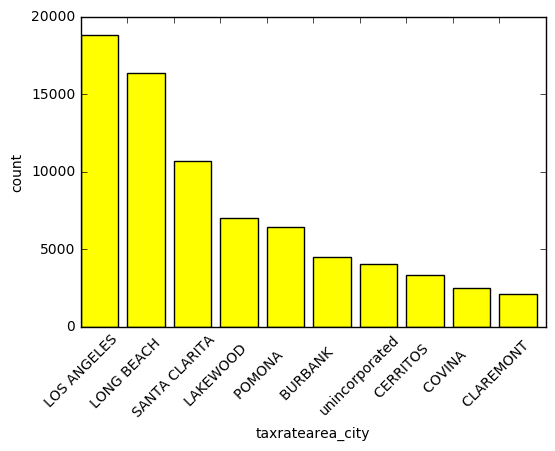

In [36]:
%matplotlib inline
result = _
result.bar(color='yellow')

# Average land price in Serveral Area

we wrote query to verify our analysis before. The below shows the average land price in different cities in LA from high to low. We can see the result is pretty same as our analysis from the whole table.

In [37]:
%%sql
SELECT TaxRateArea_CITY, AVG(LandValue) AS ave FROM(
SELECT v.LandValue, l.TaxRateArea_CITY
FROM fact4 AS f, location_dim AS l, value_dim AS v
WHERE l.location_dim_id = f.location_dim_id
AND v.value_dim_id = f.value_dim_id) AS c
GROUP BY TaxRateArea_CITY
ORDER BY ave DESC
LIMIT 10
;

10 rows affected.


taxratearea_city,ave
MALIBU,2204333.155717761557
LAKEWOOD,728641.520782396088
BURBANK,661630.903945111492
CLAREMONT,590464.074074074074
PARAMOUNT,548301.300000000000
GLENDORA,507737.666666666667
ARTESIA,470041.535410764873
CULVER CITY,454974.053571428571
IRWINDALE,444728.813186813187
WHITTIER,348143.944193061840


<Container object of 10 artists>

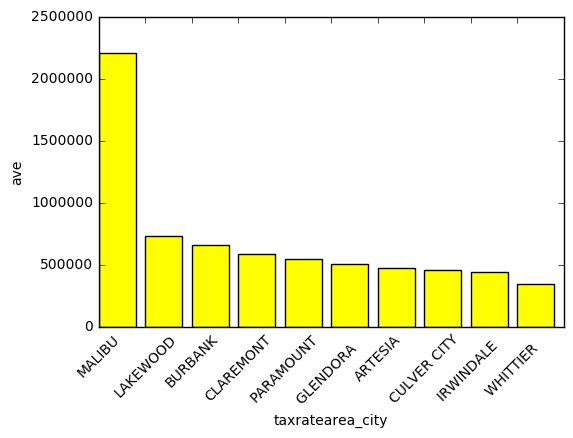

In [38]:
%matplotlib inline
result = _
result.bar(color='yellow')

# Santa Clarita's general use type

we wrote query to verify our analysis before. The below shows the number of different general use types in SANTA CLARITA from high to low. We can see the result is pretty same as our analysis from the whole table.

In [41]:
%%sql
SELECT GeneralUseType, COUNT(*) AS count FROM(
SELECT t.GeneralUseType
FROM fact4 AS f, location_dim AS l, type_dim AS t
WHERE l.location_dim_id = f.location_dim_id
AND t.type_dim_id = f.type_dim_id
AND l.TaxRateArea_CITY = 'SANTA CLARITA') AS ty
GROUP BY GeneralUseType
ORDER BY count DESC
LIMIT 5
;

5 rows affected.


generalusetype,count
Residential,49586
Commercial,820
Industrial,302
Institutional,88
Miscellaneous,30


# Top city with commercial use

In [47]:
%%sql
SELECT TaxRateArea_CITY, COUNT(*) AS count FROM(
SELECT l.TaxRateArea_CITY
FROM fact4 AS f, location_dim AS l, type_dim AS t
WHERE l.location_dim_id = f.location_dim_id
AND t.type_dim_id = f.type_dim_id
AND t.GeneralUseType = 'Commercial') AS ct
GROUP BY TaxRateArea_CITY
ORDER BY count DESC
LIMIT 10
;

10 rows affected.


taxratearea_city,count
LOS ANGELES,4807
LONG BEACH,2328
BURBANK,1361
POMONA,851
SANTA CLARITA,820
BELLFLOWER,616
POMONA,436
unincorporated,234
BURBANK,223
SAN DIMAS,218


<Container object of 10 artists>

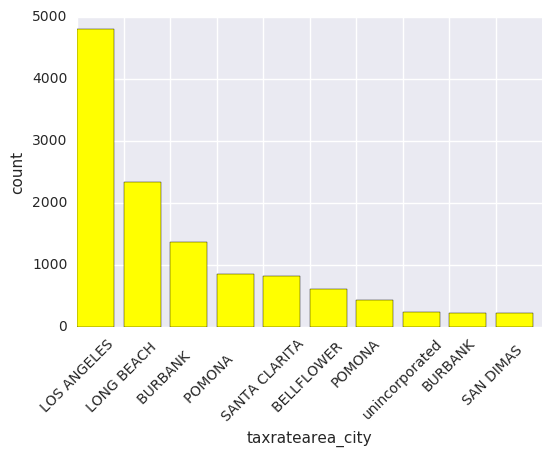

In [53]:
%matplotlib inline
result = _
result.bar(color='yellow')

# The no. of properties with different use 

In [54]:
%%sql
SELECT PropertyType, COUNT(AIN) AS "Number of Properties"
FROM fact4, type_dim
WHERE type_dim.type_dim_id = fact4.type_dim_id
GROUP BY PropertyType
ORDER BY "Number of Properties" DESC

7 rows affected.


propertytype,Number of Properties
SFR,271820
CND,44332
R-I,39326
C/I,18362
VAC,3377
OTH,2964
,10


([<matplotlib.patches.Wedge at 0x7f021c9df470>,
  <matplotlib.text.Text at 0x7f021ca00748>])

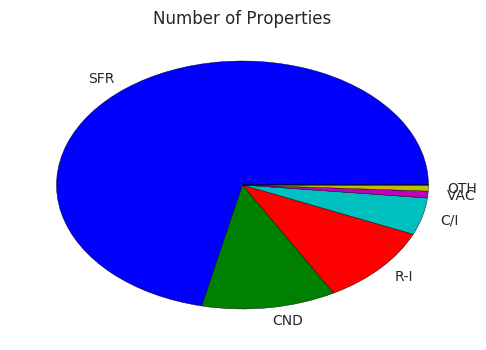

In [55]:
%matplotlib inline
result=_
result.pie()